## 按单列分组

参考：

- [Group By: split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [18]:
import numpy as np
import pandas as pd

df_groupby_single_col = pd.DataFrame({
    'Animal': ['Falcon', 'Falcon', 'Parrot', 'Parrot'],
    'Max Speed': [380., 370., 24., 26.]})
df_groupby_single_col

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [19]:
df_groupby_single_col.groupby('Animal')

In [20]:
df_groupby_single_col.groupby('Animal').sum()

,Max Speed
Animal,
Falcon,750.0
Parrot,50.0


In [21]:
# 遍历
for name, group in df_groupby_single_col.groupby('Animal'):
    print(name)
    print(group)

Falcon
   Animal  Max Speed
0  Falcon      380.0
1  Falcon      370.0
Parrot
   Animal  Max Speed
2  Parrot       24.0
3  Parrot       26.0


In [24]:
# 聚合

df_groupby_single_col.groupby('Animal').agg(['mean', 'sum'])

Max Speed       
            mean    sum
Animal                 
Falcon     375.0  750.0
Parrot      25.0   50.0

## 按多列分组


In [14]:
import numpy as np
import pandas as pd


df = pd.DataFrame(np.random.standard_normal((9, 4)).round(6))
df.columns = ['No1', 'No2', 'No3', 'No4'] # 更改列名。
df.index =  pd.date_range('2015-1-1', periods=9, freq='ME')

# 添加两列，便于后面进行groupby操作
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df['Week'] = ['W1', 'W1', 'W2', 'W1', 'W2', 'W3', 'W1', 'W2', 'W3']
df

,No1,No2,No3,No4,Quarter,Week
2015-01-31,0.156610,-0.463835,0.893636,-1.915934,Q1,W1
2015-02-28,-0.459778,-0.761915,-0.032312,1.072209,Q1,W1
2015-03-31,-0.322787,1.240322,0.060372,0.376421,Q1,W2
2015-04-30,0.882276,-0.312194,-1.138404,0.707539,Q2,W1
2015-05-31,-0.986372,0.523471,0.609971,-2.133658,Q2,W2
2015-06-30,-1.073320,2.211933,-1.433466,-0.004196,Q2,W3
2015-07-31,0.189746,1.188307,-0.395884,-1.062849,Q3,W1
2015-08-31,1.075698,0.264806,-0.542767,-1.260491,Q3,W2
2015-09-30,-0.509064,0.762819,-0.295830,0.520402,Q3,W3


In [15]:
groups_sum = df.groupby(["Quarter", "Week"]).sum()
print(groups_sum)
print(groups_sum["No1"].max())
print(groups_sum["No1"].idxmax())
print(type(groups_sum["No1"].idxmax()))
print(groups_sum.loc[groups_sum["No1"].idxmax()]["No1"])



                   No1       No2       No3       No4
Quarter Week                                        
Q1      W1   -0.303168 -1.225750  0.861324 -0.843725
        W2   -0.322787  1.240322  0.060372  0.376421
Q2      W1    0.882276 -0.312194 -1.138404  0.707539
        W2   -0.986372  0.523471  0.609971 -2.133658
        W3   -1.073320  2.211933 -1.433466 -0.004196
Q3      W1    0.189746  1.188307 -0.395884 -1.062849
        W2    1.075698  0.264806 -0.542767 -1.260491
        W3   -0.509064  0.762819 -0.295830  0.520402
1.075698
('Q3', 'W2')
<class 'tuple'>
1.075698


In [16]:
# 遍历
for (key1, key2), group in df.groupby(["Quarter", "Week"]):
    print(key1, key2)
    print(group)

Q1 W1
                 No1       No2       No3       No4 Quarter Week
2015-01-31  0.156610 -0.463835  0.893636 -1.915934      Q1   W1
2015-02-28 -0.459778 -0.761915 -0.032312  1.072209      Q1   W1
Q1 W2
                 No1       No2       No3       No4 Quarter Week
2015-03-31 -0.322787  1.240322  0.060372  0.376421      Q1   W2
Q2 W1
                 No1       No2       No3       No4 Quarter Week
2015-04-30  0.882276 -0.312194 -1.138404  0.707539      Q2   W1
Q2 W2
                 No1       No2       No3       No4 Quarter Week
2015-05-31 -0.986372  0.523471  0.609971 -2.133658      Q2   W2
Q2 W3
                No1       No2       No3       No4 Quarter Week
2015-06-30 -1.07332  2.211933 -1.433466 -0.004196      Q2   W3
Q3 W1
                 No1       No2       No3       No4 Quarter Week
2015-07-31  0.189746  1.188307 -0.395884 -1.062849      Q3   W1
Q3 W2
                 No1       No2       No3       No4 Quarter Week
2015-08-31  1.075698  0.264806 -0.542767 -1.260491      Q3   W2


In [ ]:
groups_cnt = df.groupby(["Quarter", "Week"]).count()
print(groups_cnt)
print(groups_cnt.loc[groups_sum["No1"].idxmax()]["No1"])

## 用字典定义分组

In [35]:
df_usefor_groupby_dict = pd.DataFrame({
    'Animal': ['Falcon', 'Falcon', 'Parrot', 'Parrot'],
    'Max Speed': [380., 370., 24., 26.],
    'Count': [100, 370, 24, 26]})
df_usefor_groupby_dict

,Animal,Max Speed,Count
0,Falcon,380.0,100
1,Falcon,370.0,370
2,Parrot,24.0,24
3,Parrot,26.0,26


In [33]:
my_dict = {'Max Speed' : 'A', 'Count' : 'A'}
df_usefor_groupby_dict.groupby(my_dict, axis=1).sum()

C:\Users\lianbche\AppData\Local\Temp\ipykernel_13512\1472673647.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_usefor_groupby_dict.groupby(my_dict, axis=1).sum()


,A
0,480.0
1,740.0
2,48.0
3,52.0


In [38]:
df_usefor_groupby_dict.T

,0,1,2,3
Animal,Falcon,Falcon,Parrot,Parrot
Max Speed,380.0,370.0,24.0,26.0
Count,100,370,24,26


In [36]:
df_usefor_groupby_dict.T.groupby(my_dict).sum()

,0,1,2,3
A,480.0,740.0,48.0,52.0


## GroupBy to Dataframe

In [31]:
import pandas as pd

df = pd.read_csv('transform_data.csv')
print(df)

groups = df.groupby(['sfn', 'slot'])
#groups.size().to_frame(name='count').reset_index()
groups.count().reset_index()

   sfn  slot   in  out
0  697     3  533  546
1  697     4  165  176
2  697     4  634  645
3  697     5  165  171
4  697     5  184  208


,sfn,slot,in,out
0,697,3,1,1
1,697,4,2,2
2,697,5,2,2


## transform

In [45]:
import time
import pandas as pd

df = pd.read_csv('transform_data.csv')

t1 = time.time()
groups = df.groupby(['sfn', 'slot'])
df['cost'] = groups['out'].transform('last') - groups['in'].transform('first')
df = df.drop_duplicates(subset=['sfn', 'slot'], keep='first')
t2 = time.time()

print('TIME COST: {}'.format(t2 - t1))
print(df)


TIME COST: 0.012050151824951172
       sfn  slot  handleMsgOffsetInSlot  sendPayloadOffsetInSlot  cost
0      697     3                    533                      546    13
1      697     4                    165                      176   480
30     697     5                    165                      171   477
58     697     6                    161                      179   482
90     697     7                    170                      196   475
...    ...   ...                    ...                      ...   ...
30343  800     0                    172                      182   402
30373  800     1                    178                      188   426
30400  800     2                    176                      185   422
30429  800     4                    162                      176   458
30462  800     6                    161                      172   467

[962 rows x 5 columns]


## stack

In [1]:
import time
import pandas as pd

df = pd.read_csv('transform_data.csv')

groups = df.groupby(['sfn', 'slot'])

print(groups)

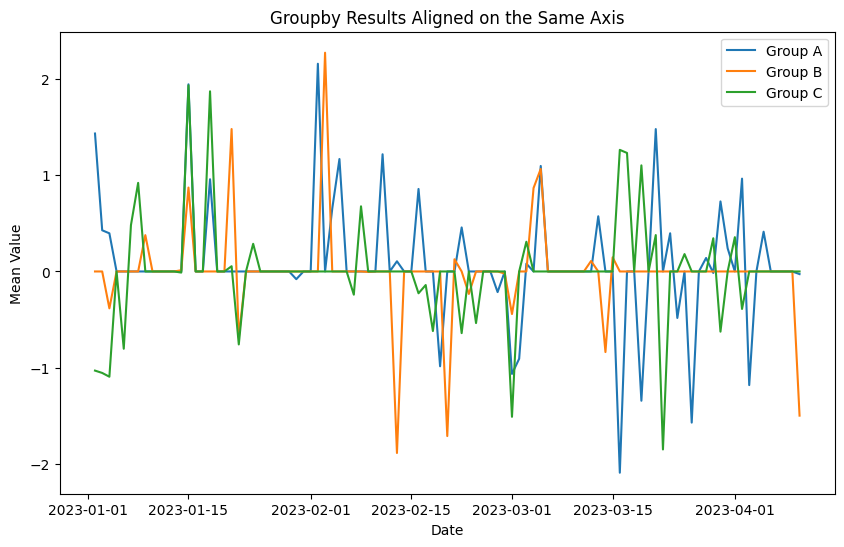

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 创建示例数据
np.random.seed(42)
dates = pd.date_range('2023-01-01', periods=100)
df = pd.DataFrame({
    'date': np.random.choice(dates, 100),
    'group': np.random.choice(['A', 'B', 'C'], 100),
    'value': np.random.randn(100)
})

# 对每个组进行groupby，并计算每日平均值
grouped_A = df[df['group'] == 'A'].groupby('date')['value'].mean()
grouped_B = df[df['group'] == 'B'].groupby('date')['value'].mean()
grouped_C = df[df['group'] == 'C'].groupby('date')['value'].mean()

# 创建一个包含所有日期的完整索引
full_index = pd.date_range(df['date'].min(), df['date'].max())

# 重新索引每个groupby结果以对齐日期
grouped_A = grouped_A.reindex(full_index, fill_value=0)
grouped_B = grouped_B.reindex(full_index, fill_value=0)
grouped_C = grouped_C.reindex(full_index, fill_value=0)

# 将所有groupby结果合并到一个数据框中
result = pd.DataFrame({
    'A': grouped_A,
    'B': grouped_B,
    'C': grouped_C
})

# 绘制图表
plt.figure(figsize=(10, 6))
plt.plot(result.index, result['A'], label='Group A')
plt.plot(result.index, result['B'], label='Group B')
plt.plot(result.index, result['C'], label='Group C')

plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.title('Groupby Results Aligned on the Same Axis')
plt.legend()
plt.show()
